In [7]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

d0 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/mnist_train.csv')
l = d0['label']

d = d0.drop('label', axis=1)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
labels = l.head(15000)
data =  d.head(15000)

print(data.shape)

(15000, 784)


In [9]:
#data-preprocessing, stanardizing the data -> (x_i-u_i)/(standard deviation)_i
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)

(15000, 784)


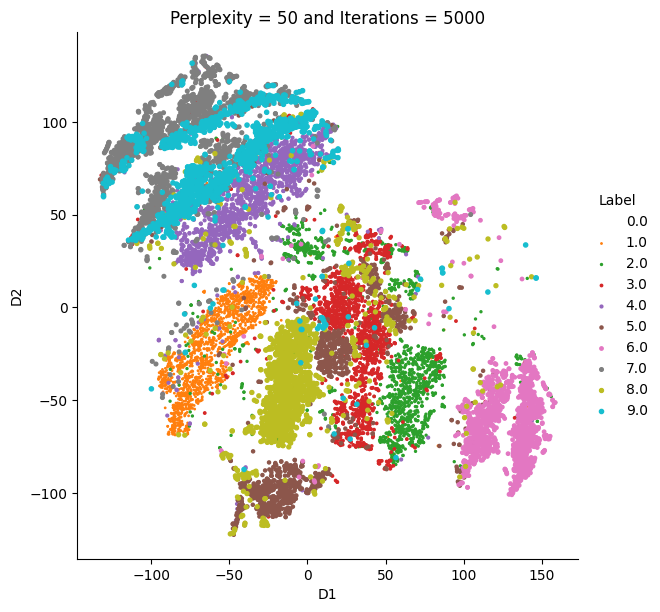

In [11]:
from sklearn.manifold import TSNE
#picking points
data_points =  standardized_data
labels_data_points =  labels
# setting random to particular number results in same result
# removing random state will result in slight changes in result each time it runs
# number of components = 2
# default perplexity = 30
# default learning rate = 200
# default max iterations for the optimization = 1000
# Perplexity = 50 and Iterations = 5000

model = TSNE(n_components = 2, random_state=0, perplexity=50, n_iter=10000)

tsne_data = model.fit_transform(data_points)

#creating new data frame
tsne_data = np.vstack((tsne_data.T, labels_data_points)).T
tsne_df = pd.DataFrame(data = tsne_data, columns = ('D1','D2','Label'))

#plotting the result
sn.FacetGrid(tsne_df, hue='Label', height=6).map(plt.scatter,'D1','D2','Label').add_legend()
plt.title('Perplexity = 50 and Iterations = 5000')
plt.show()